In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from scipy import stats
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from scipy import stats
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
personal = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/2022%20Ukraine%20Russia%20War/russia_losses_personnel.csv")
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        25 non-null     object
 1   day         25 non-null     int64 
 2   personnel   25 non-null     int64 
 3   personnel*  25 non-null     object
 4   POW         25 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ KB


In [40]:
equipment = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/2022%20Ukraine%20Russia%20War/russia_losses_equipment.csv")
equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   25 non-null     object 
 1   day                    25 non-null     int64  
 2   aircraft               25 non-null     int64  
 3   helicopter             25 non-null     int64  
 4   tank                   25 non-null     int64  
 5   APC                    25 non-null     int64  
 6   field artillery        25 non-null     int64  
 7   MRL                    25 non-null     int64  
 8   military auto          25 non-null     int64  
 9   fuel tank              25 non-null     int64  
 10  drone                  25 non-null     int64  
 11  naval ship             25 non-null     int64  
 12  anti-aircraft warfare  25 non-null     int64  
 13  special equipment      6 non-null      float64
dtypes: float64(1), int64(12), object(1)
memory usage: 2.9+ KB


In [41]:
equipment['personnel'] = personal['personnel']
equipment['POW'] = personal['POW']

In [42]:
equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   25 non-null     object 
 1   day                    25 non-null     int64  
 2   aircraft               25 non-null     int64  
 3   helicopter             25 non-null     int64  
 4   tank                   25 non-null     int64  
 5   APC                    25 non-null     int64  
 6   field artillery        25 non-null     int64  
 7   MRL                    25 non-null     int64  
 8   military auto          25 non-null     int64  
 9   fuel tank              25 non-null     int64  
 10  drone                  25 non-null     int64  
 11  naval ship             25 non-null     int64  
 12  anti-aircraft warfare  25 non-null     int64  
 13  special equipment      6 non-null      float64
 14  personnel              25 non-null     int64  
 15  POW     

In [43]:
scaler_features = MinMaxScaler().fit_transform(equipment[equipment.columns.values[2:]])
for i,val in enumerate(equipment.columns.values[2:]):
    equipment[val+"_scaled"] = scaler_features[:,i]

In [44]:
feature_columns= list(set(equipment.columns[2:17].values.tolist())-set(['personnel','POW']))
feature_scaled= list(set(equipment.columns[17:].values.tolist())-set(['personnel_scaled','POW_scaled']))

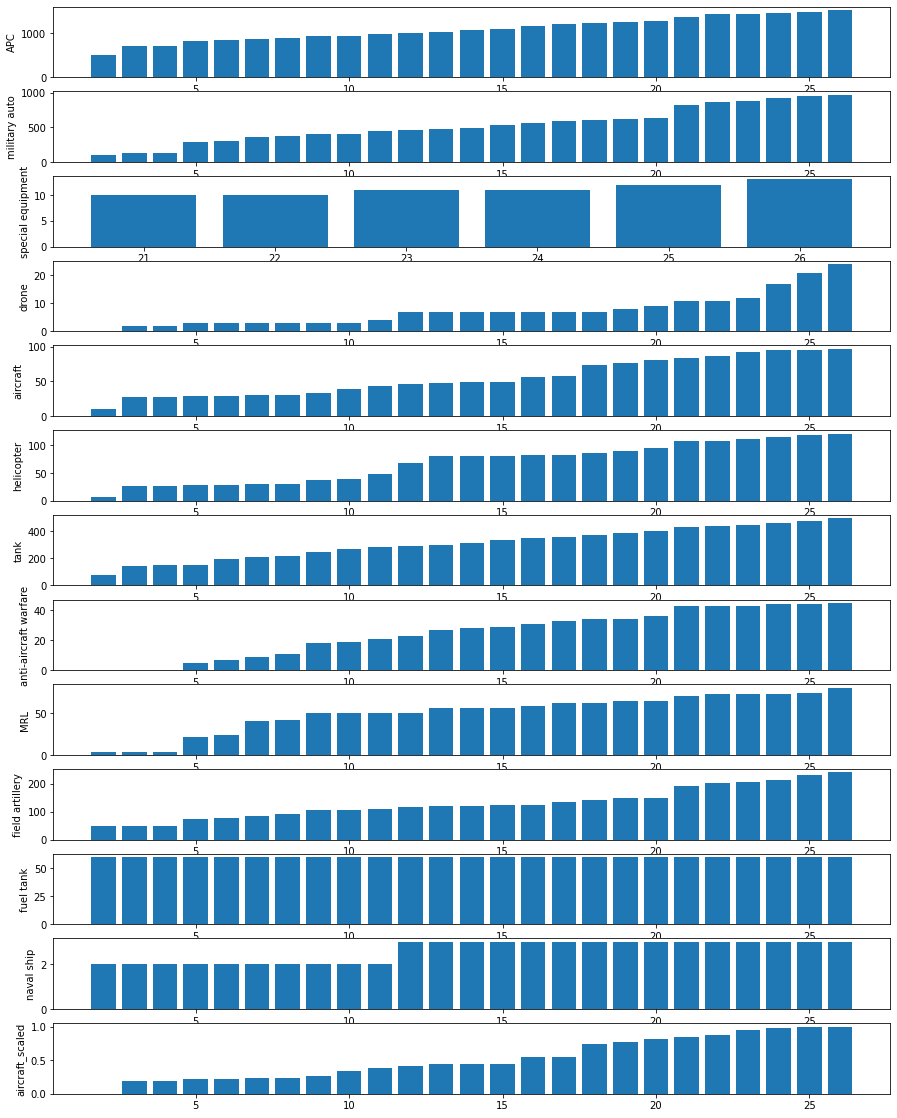

In [45]:
feature_columns= list(set(equipment.columns[2:17].values.tolist())-set(['personnel','POW']))
feature_scaled= list(set(equipment.columns[17:].values.tolist())-set(['personnel_scaled','POW_scaled']))
_,ax = plt.subplots(len(feature_columns),1,figsize=(15,20))
j,k=0,0
for i,val in enumerate(equipment[feature_columns]):
    ax[i].bar(equipment["day"],equipment[val])
    ax[i].set_ylabel(val)
plt.show()

[Text(0, 0, '2'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '7'),
 Text(6, 0, '8'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '11'),
 Text(10, 0, '12'),
 Text(11, 0, '13'),
 Text(12, 0, '14'),
 Text(13, 0, '15'),
 Text(14, 0, '16'),
 Text(15, 0, '17'),
 Text(16, 0, '18'),
 Text(17, 0, '19'),
 Text(18, 0, '20'),
 Text(19, 0, '21')]

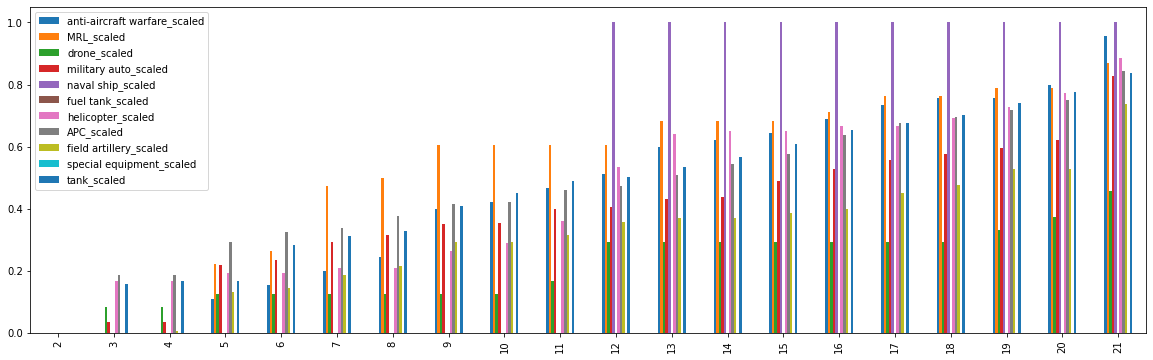

In [48]:
ax = equipment[feature_scaled][0:20].plot(kind='bar',figsize=(20,6))
ax.set_xticklabels(equipment['day'][0:20].values)

[Text(0, 0, '22'),
 Text(1, 0, '23'),
 Text(2, 0, '24'),
 Text(3, 0, '25'),
 Text(4, 0, '26')]

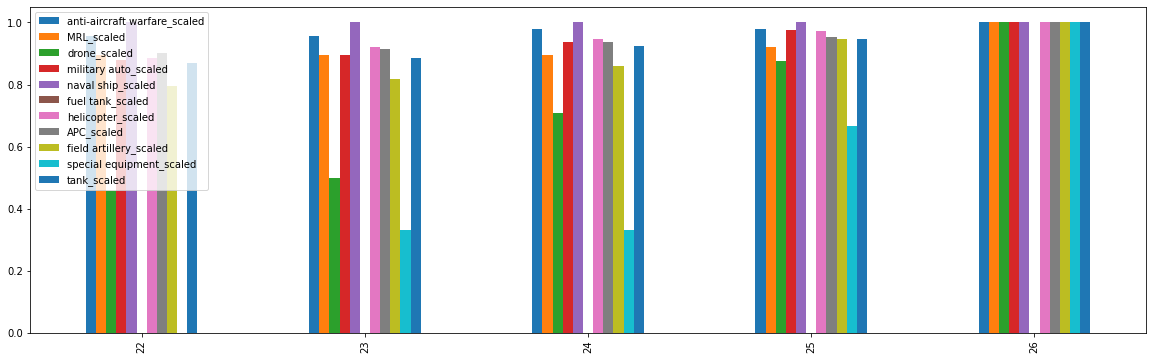

In [49]:
ax = equipment[feature_scaled][20:].plot(kind='bar',figsize=(20,6))
ax.set_xticklabels(equipment['day'][20:].values)

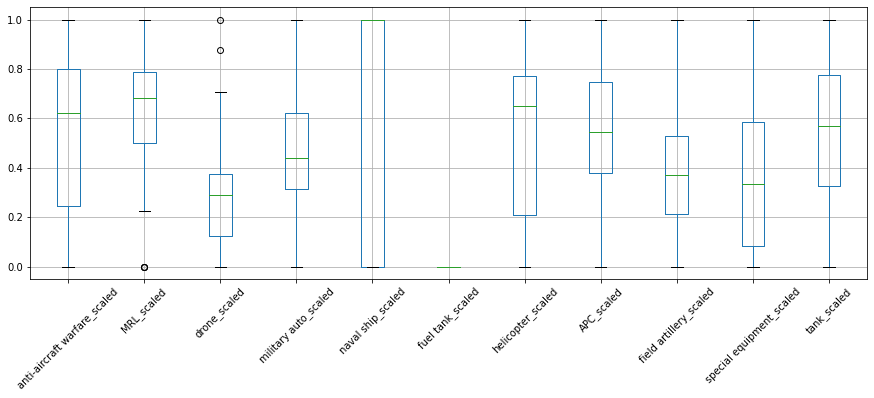

In [50]:
equipment.boxplot(column=feature_scaled,figsize=(15,5),widths=0.3)
plt.xticks(rotation = 45) 
plt.show()

In [53]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              personnel   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     53.64
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           5.52e-09
Time:                        23:25:18   Log-Likelihood:                -192.26
No. Observations:                  25   AIC:                             408.5
Df Residuals:                      13   BIC:                             423.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
APC                      -3.10

In [54]:
equipment[equipment.columns[2:17]].corr()

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,personnel,POW,aircraft_scaled
aircraft,1.000000,0.963469,0.970948,0.978514,0.963302,0.871487,0.965112,NaN,0.888420,0.803525,0.951103,0.877345,0.895750,0.848576,1.000000
helicopter,0.963469,1.000000,0.976668,0.971074,0.943859,0.904068,0.950779,NaN,0.874751,0.913503,0.977733,0.976071,0.942537,0.905281,0.963469
tank,0.970948,0.976668,1.000000,0.992519,0.964485,0.951699,0.976078,NaN,0.871202,0.838334,0.988372,0.960887,0.964269,0.933765,0.970948
APC,0.978514,0.971074,0.992519,1.000000,0.974490,0.936307,0.987729,NaN,0.883925,0.812810,0.976666,0.919236,0.942750,0.907365,0.978514
field artillery,0.963302,0.943859,0.964485,0.974490,1.000000,0.902437,0.993648,NaN,0.936105,0.754944,0.950800,0.966470,0.904470,0.840501,0.963302
MRL,0.871487,0.904068,0.951699,0.936307,0.902437,1.000000,0.927434,NaN,0.765163,0.790000,0.960058,0.911805,0.970857,0.951987,0.871487
military auto,0.965112,0.950779,0.976078,0.987729,0.993648,0.927434,1.000000,NaN,0.907570,0.768941,0.964635,0.933454,0.922752,0.875987,0.965112
fuel tank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drone,0.888420,0.874751,0.871202,0.883925,0.936105,0.765163,0.907570,NaN,1.000000,0.691284,0.832892,0.949474,0.788559,0.705584,0.888420
naval ship,0.803525,0.913503,0.838334,0.812810,0.754944,0.790000,0.768941,NaN,0.691284,1.000000,0.872432,NaN,0.844156,0.860360,0.803525


In [60]:
features = ['MRL','mobile SRBM system','field artillery']